# 1.BUSINESS UNDERSTANDING
    A. INTRODUCTION
In today's digital era, the world of cinema has witnessed a transformative shift. Streaming platforms have unlocked a vast library of movies, granting users unprecedented access to a multitude of entertainment options. However, amidst this abundance, users often find themselves overwhelmed, struggling to identify movies that resonate with their individual tastes. In response to this challenge, I introduce an innovative movie recommendation system, poised to revolutionize the way users discover and enjoy films.

    B.PROBLEM STATEMENT
The proliferation of online streaming platforms has created an ocean of cinematic choices, leaving users adrift in the quest for their next movie night selection. Navigating this vast sea of options can be daunting and time-consuming, often resulting in decision fatigue and missed opportunities to explore content aligned with one's preferences. My project seeks to address this issue by crafting a sophisticated movie recommendation system capable of leveraging user data and machine learning to deliver personalized movie suggestions. It aims to tackle the challenge of guiding users toward enjoyable movie choices, even for those who are new to the platform or movies with limited ratings.

    C.MAIN OBJECTIVE
To create a movie recommendation system that suggests the top 5 movies to users based on their ratings of other movies.

    D.SPECIFIC OBJECTIVES

# 2.IMPORTING LIBRARIES

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 3.LOADING THE DATA

In [25]:
#loading data on movies.csv
movie_data = pd.read_csv('Datasets/movies.csv')
movie_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [26]:
#loading data on ratings.csv
rating_data = pd.read_csv('Datasets/ratings.csv')
rating_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# 4.DATA CLEANING


In [27]:
ratings = pd.merge(movie_data,rating_data, on='movieId')
ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


### 4.1. DROPPING COLUMNS

Only a few features and rows from the various datasets that were gathered are important to the procedure. As a result, in this stage, the features from each dataset that were not necessary were removed. 

In [28]:
ratings= ratings.drop(columns=['timestamp'],axis=1)
ratings.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


# 5.EXPLORATORY DATA ANALYSIS

### 5.1. DATA VISUALIZATIONS

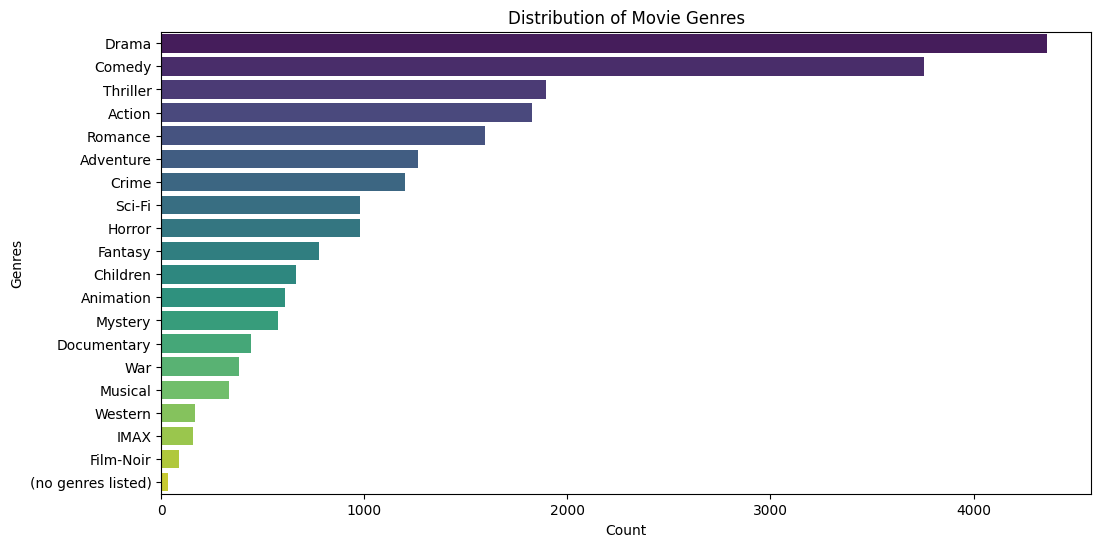

In [29]:
#Plot the distribution of movie genres
genre_counts = movie_data['genres'].str.split('|', expand=True).stack().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title('Distribution of Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

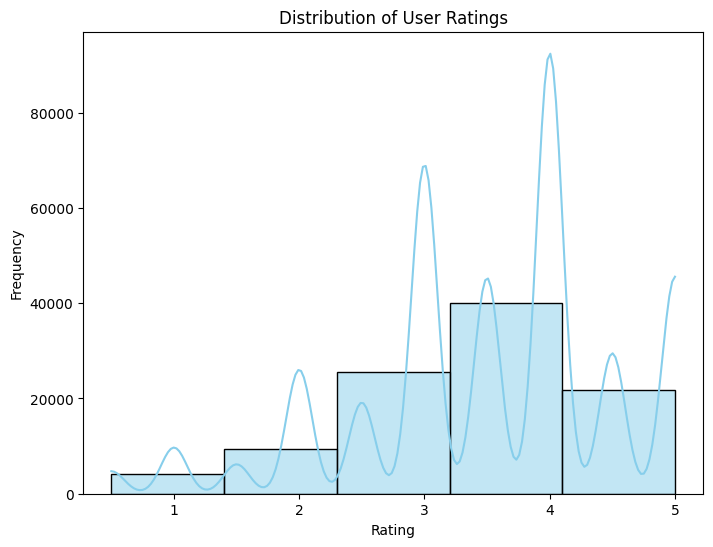

In [30]:
#Plot the distribution of user ratings
plt.figure(figsize=(8, 6))
sns.histplot(rating_data['rating'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [31]:
user_item_matrix = ratings.pivot_table(index=['userId'], columns=['title'], values='rating')
user_item_matrix.head()


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###     5.2.CREATE USER-ITEM RATING MATRIX
After merging,  I created the user-item rating matrix. This matrix will have users as rows, movies as columns, and user ratings as values.The resulting user_item_matrix will be the basis for collaborative filtering, enabling me to make recommendations based on user-item interactions.

In [32]:
#remove movies which have less than 10 users who rated it
user_item_matrix = user_item_matrix.dropna(thresh=10,axis=1).fillna(0)
user_item_matrix

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.5,3.5,0.0


In [33]:
# Calculate the mean rating for each user
user_means = user_item_matrix.mean(axis=1)

# Subtract the user mean from each user's ratings
ratings = user_item_matrix.sub(user_means, axis=0)

# Display the normalized ratings
ratings.head()


title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.407669,-0.407669,-0.407669,-0.407669,-0.407669,-0.407669,-0.407669,-0.407669,-0.407669,-0.407669,...,-0.407669,-0.407669,-0.407669,-0.407669,-0.407669,-0.407669,-0.407669,-0.407669,-0.407669,3.592331
2,-0.045615,-0.045615,-0.045615,-0.045615,-0.045615,-0.045615,-0.045615,-0.045615,-0.045615,-0.045615,...,-0.045615,-0.045615,-0.045615,-0.045615,2.954385,-0.045615,-0.045615,-0.045615,-0.045615,-0.045615
3,-0.015646,-0.015646,-0.015646,-0.015646,-0.015646,-0.015646,-0.015646,-0.015646,-0.015646,-0.015646,...,-0.015646,-0.015646,-0.015646,-0.015646,-0.015646,-0.015646,-0.015646,-0.015646,-0.015646,-0.015646
4,-0.283385,-0.283385,-0.283385,-0.283385,-0.283385,-0.283385,-0.283385,4.716615,-0.283385,-0.283385,...,-0.283385,-0.283385,-0.283385,-0.283385,-0.283385,-0.283385,-0.283385,-0.283385,-0.283385,-0.283385
5,-0.070516,-0.070516,-0.070516,-0.070516,-0.070516,-0.070516,-0.070516,-0.070516,-0.070516,-0.070516,...,-0.070516,-0.070516,-0.070516,-0.070516,-0.070516,-0.070516,-0.070516,-0.070516,-0.070516,-0.070516


In [34]:
#lets build similarity matrix
item_similarity_df = ratings.corr(method= 'pearson')
item_similarity_df.head(15)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,-0.051640,-0.006462,0.024534,-0.000295,0.006611,0.099188,-0.053683,0.016356,-0.006807,...,-0.128401,-0.015802,0.075823,-0.031900,-0.067347,-0.162970,-0.053077,0.105132,-0.059376,0.283724
(500) Days of Summer (2009),-0.051640,1.000000,0.061564,0.175305,0.080486,0.045608,0.008415,0.075845,0.053372,0.120637,...,0.262013,0.074209,-0.057674,0.303242,0.249430,0.107393,0.138084,-0.079205,0.099093,-0.008026
10 Cloverfield Lane (2016),-0.006462,0.061564,1.000000,-0.104003,0.151222,-0.044789,-0.127596,-0.031840,0.026993,0.289584,...,0.165667,0.094699,-0.044445,0.131662,0.109482,0.030312,0.295011,0.127825,0.031776,-0.052181
10 Things I Hate About You (1999),0.024534,0.175305,-0.104003,1.000000,0.120572,0.124956,0.087598,-0.089118,-0.003619,-0.056095,...,0.101321,-0.015747,0.005599,-0.081690,0.023068,0.145907,-0.049077,-0.007882,-0.039011,-0.031816
"10,000 BC (2008)",-0.000295,0.080486,0.151222,0.120572,1.000000,0.159719,-0.027604,-0.032152,0.005658,0.091486,...,0.139187,0.054208,0.042918,-0.018073,0.066252,0.025677,0.046911,-0.001651,0.100216,-0.007759
101 Dalmatians (1996),0.006611,0.045608,-0.044789,0.124956,0.159719,1.000000,0.182038,0.039723,0.019066,-0.033367,...,-0.026488,-0.009971,-0.000453,-0.104696,-0.027010,0.028934,-0.021828,-0.065533,0.025213,-0.039145
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.099188,0.008415,-0.127596,0.087598,-0.027604,0.182038,1.000000,0.033637,-0.093641,-0.166106,...,-0.069937,-0.007849,-0.105381,-0.119358,0.016885,0.113196,-0.031798,-0.067251,0.078979,0.018657
12 Angry Men (1957),-0.053683,0.075845,-0.031840,-0.089118,-0.032152,0.039723,0.033637,1.000000,0.069478,-0.008262,...,-0.016845,-0.061045,-0.013643,0.136128,0.040748,-0.003734,-0.013427,-0.107091,-0.054578,0.000323
12 Years a Slave (2013),0.016356,0.053372,0.026993,-0.003619,0.005658,0.019066,-0.093641,0.069478,1.000000,0.261441,...,-0.075873,0.025955,-0.014240,0.044366,-0.034050,-0.160956,0.035298,-0.058671,-0.039030,-0.056894


In [35]:
def get_similar_movies(movie_name,user_rating):
    similar_score = item_similarity_df[movie_name]*(user_rating)
    similar_score = similar_score.sort_values(ascending=False)

    return similar_score

get_similar_movies("13 Going on 30 (2004)",5)


title
13 Going on 30 (2004)       5.000000
Freaky Friday (2003)        2.585016
27 Dresses (2008)           2.415122
Wedding Date, The (2005)    2.138287
Sex and the City (2008)     2.050133
                              ...   
Blade Runner (1982)        -1.057061
Apocalypse Now (1979)      -1.070515
Platoon (1986)             -1.114076
Scarface (1983)            -1.118229
RoboCop (1987)             -1.127207
Name: 13 Going on 30 (2004), Length: 2269, dtype: float64

In [36]:
# Get the similarity scores for "13 Going on 30 (2004)"
similar_movies = get_similar_movies("13 Going on 30 (2004)", 1)  # User rating of 1 (can be adjusted)

# Sort the movies by similarity score in descending order and get the top 100
top_correlated_movies = similar_movies[1:].nlargest(100)

# Display the top 100 correlated movies
print(top_correlated_movies)


title
Freaky Friday (2003)          0.517003
27 Dresses (2008)             0.483024
Wedding Date, The (2005)      0.427657
Sex and the City (2008)       0.410027
Walk to Remember, A (2002)    0.390303
                                ...   
The Scorpion King (2002)      0.203286
Date Night (2010)             0.202054
Tarzan (1999)                 0.199880
Night at the Museum (2006)    0.197801
Paycheck (2003)               0.197423
Name: 13 Going on 30 (2004), Length: 100, dtype: float64


In [37]:
def get_movie_recommendations(movie_name, user_rating):
    similar_scores = get_similar_movies(movie_name, user_rating)
    
    # Filter out movies with low or negative similarity scores
    recommended_movies = similar_scores[similar_scores > 0]
    
    # Sort the recommended movies by similarity score in descending order
    recommended_movies = recommended_movies.sort_values(ascending=False)
    
    return recommended_movies


In [38]:
# Example: Recommend movies for a user who liked "The Matrix" (movie name) with a user rating of 4
user_rating = 4
movie_name = "12 Years a Slave (2013)"

recommended_movies = get_movie_recommendations(movie_name, user_rating)

# Display the top 5 recommended movies
top_recommendations = recommended_movies.head(5)
print("Top Recommended Movies:")
print(top_recommendations)


Top Recommended Movies:
title
12 Years a Slave (2013)                4.000000
Dallas Buyers Club (2013)              1.903029
Midnight in Paris (2011)               1.836999
Elite Squad (Tropa de Elite) (2007)    1.764680
American Sniper (2014)                 1.567197
Name: 12 Years a Slave (2013), dtype: float64


In [39]:
def get_movie_recommendations(movie_name, user_rating, min_rating=4, max_rating=5):
    similar_scores = get_similar_movies(movie_name, user_rating)
    
    # Filter out movies with low or negative similarity scores
    recommended_movies = similar_scores[similar_scores > 0]
    
    # Filter movies based on user rating (between min_rating and max_rating)
    recommended_movies = recommended_movies[
        (recommended_movies.index >= min_rating) & (recommended_movies.index <= max_rating)
    ]
    
    # Sort the recommended movies by similarity score in descending order
    recommended_movies = recommended_movies.sort_values(ascending=False)
    
    return recommended_movies



### User-Based Collaborative Filtering

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate user similarities using cosine similarity
user_similarity = cosine_similarity(user_item_matrix)

# Create a similarity matrix with user IDs as both rows and columns
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
user_similarity_df.head(10)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.029977,0.115634,0.220630,0.134869,0.152359,0.171920,0.143111,0.078232,0.020274,...,0.087144,0.177122,0.299060,0.078538,0.171066,0.223976,0.294053,0.318185,0.114858,0.192235
2,0.029977,1.000000,0.000000,0.004256,0.017471,0.030313,0.030067,0.028663,0.000000,0.081552,...,0.220663,0.018282,0.016380,0.000000,0.000000,0.039487,0.014224,0.050836,0.034054,0.136366
3,0.115634,0.000000,1.000000,0.004532,0.009302,0.008300,0.000000,0.009157,0.000000,0.000000,...,0.009686,0.009345,0.060133,0.000000,0.022530,0.029831,0.037261,0.040960,0.000000,0.053826
4,0.220630,0.004256,0.004532,1.000000,0.139754,0.102408,0.129614,0.068399,0.014378,0.038924,...,0.096651,0.139214,0.385004,0.061218,0.104452,0.265791,0.149505,0.169651,0.041088,0.146282
5,0.134869,0.017471,0.009302,0.139754,1.000000,0.341757,0.112298,0.429075,0.000000,0.035198,...,0.070455,0.431643,0.143016,0.275246,0.169116,0.140585,0.159699,0.141788,0.306893,0.076965
6,0.152359,0.030313,0.008300,0.102408,0.341757,1.000000,0.089450,0.421566,0.018433,0.026671,...,0.025229,0.513082,0.132724,0.452754,0.135232,0.143822,0.187551,0.210794,0.286378,0.075874
7,0.171920,0.030067,0.000000,0.129614,0.112298,0.089450,1.000000,0.119080,0.120117,0.154417,...,0.221509,0.133748,0.139512,0.068383,0.257639,0.270861,0.201532,0.350826,0.110615,0.253223
8,0.143111,0.028663,0.009157,0.068399,0.429075,0.421566,0.119080,1.000000,0.000000,0.027498,...,0.083040,0.567507,0.131303,0.345151,0.136905,0.131277,0.193417,0.195872,0.498103,0.098945
9,0.078232,0.000000,0.000000,0.014378,0.000000,0.018433,0.120117,0.000000,1.000000,0.054873,...,0.097879,0.011117,0.055150,0.023507,0.128205,0.102984,0.014416,0.122416,0.000000,0.101549


In [41]:
def get_user_based_movie_recommendations(user_id, num_recommendations=5):
    # Get the user's similarity scores with other users
    user_similarity_scores = user_similarity_df[user_id]
    
    # Sort users by similarity score in descending order
    similar_users = user_similarity_scores.sort_values(ascending=False)
    
    # Get the movies that the user has not rated yet
    user_movies_rated = user_item_matrix.loc[user_id]
    unrated_movies = user_movies_rated[user_movies_rated.isnull()]
    
    # Create an empty DataFrame to store movie recommendations
    recommendations = pd.DataFrame(columns=['Movie', 'Similarity Score'])
    
    # Iterate through the index and values of the similar_users Series
    for similar_user_id, similarity_score in similar_users.items():
        similar_user_movies = user_item_matrix.loc[similar_user_id]
        unrated_similar_user_movies = similar_user_movies[user_movies_rated.isnull()]
        
        # Calculate the contribution of each similar user's rated movies to recommendations
        contribution = unrated_similar_user_movies * similarity_score
        
        # Add the contribution to the recommendations DataFrame
        recommendations = pd.concat([recommendations, contribution], axis=0)
    
    # Sum the contribution of all similar users for each movie
    movie_scores = recommendations.groupby('Movie').sum()
    
    # Sort movies by their total similarity scores
    top_recommendations = movie_scores.sort_values(by='Similarity Score', ascending=False)
    
    # Get the top recommended movies
    top_recommendations = top_recommendations.head(num_recommendations)
    
    return top_recommendations

# Example: Get user-based movie recommendations for a specific user (user_id)
user_id = 601
user_recommendations = get_user_based_movie_recommendations(user_id)

print(f"Top {len(user_recommendations)} Recommended Movies for User {user_id}:")
print(user_recommendations)


Top 0 Recommended Movies for User 601:
Empty DataFrame
Columns: [Similarity Score, 0]
Index: []


# 6.RECOMMENDATION SYSTEM DEVELOPMENT

In [42]:
!pip install scikit-surprise

  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for scikit-surprise
Failed to build scikit-surprise


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [101 lines of output]
      C:\Users\Public\Documents\Wondershare\CreatorTemp\pip-install-ondth2qu\scikit-surprise_013e43d09d684899a11a85cb79d45afe\setup.py:65: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
      !!
      
              ********************************************************************************
              Requirements should be satisfied by a PEP 517 installer.
              If you are using pip, you can try `pip install --use-pep517`.
              ********************************************************************************
      
      !!
        dist.Distribution().fetch_build_eggs(["numpy>=1.17.3"])
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-310
      creating build\lib.win-amd64-cpython-310\surprise
      copyi

In [19]:
import warnings
warnings.filterwarnings('ignore')
from surprise import Reader, Dataset
# read in values as Surprise dataset 
reader = Reader(rating_scale=(0.5, 5.0))
#load the dataset using the Surprise Dataset class
data =  Dataset.load_from_df(ratings, reader)
#build the full trainset
dataset = data.build_full_trainset()
#print the number of users and items
print('Number of users:', dataset.n_users)
print('Number of items:', dataset.n_items)

ModuleNotFoundError: No module named 'surprise'